# US9 - Custos do Consumo de Água

## 1. Introdução

$\textbf{Nesta User Story (US09)}$ foi-nos pedido a realização de uma análise estatística relativa aos custos de consumo de água em todos os parques. Recebemos um arquivo denominado $\textit{water_consumption.csv}$ que fornece os dados necessários para a realização do estudo. 
Este arquivo registra o consumo diário de água (em $m^3$) desde o dia de abertura de cada parque. O valor pago pela água é de $0.7\,€/m^3$ até um consumo de $1000\,m^3/mês$, com uma taxa de $15\%$ para consumos superiores.




## 2. Código e Resultados

In [1]:
# importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

### Consumo Mensal de Água

In [2]:
# leitura do ficheiro com o consumo de água
data = pd.read_csv('water_consumption.csv', sep=';', skiprows = 1, names=['Park', 'Year', 'Month', 'Day', 'Consumption'])

data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)
data['Consumption'] = data['Consumption'].astype(str).str.replace(',', '.').astype(float)

### Barplot

Digite o ano para o qual pretende o estudo: 2023
Digite o o mês no qual pretende começar o estudo: 1
Digite o mês no qual pretende terminar o estudo: 12
Digite a identificação do parque para o qual pretende o estudo: Cidade


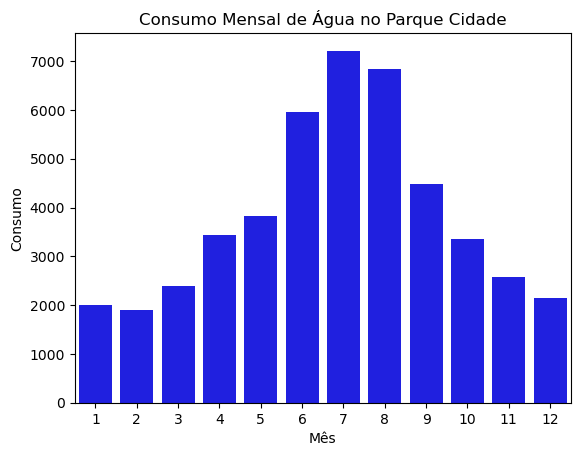

In [5]:
ano = int(input('Digite o ano para o qual pretende o estudo: '))
mesInicio = int(input('Digite o o mês no qual pretende começar o estudo: '))
mesFim = int(input('Digite o mês no qual pretende terminar o estudo: '))
identificacao_parque = (input('Digite a identificação do parque para o qual pretende o estudo: '))

dados_filtrados = data[(data['Year'] == ano) & 
                       (data['Month'] >= mesInicio) & 
                       (data['Month'] <= mesFim) & 
                       (data['Park'] == identificacao_parque)]

consumo_mensal = dados_filtrados.groupby('Month')['Consumption'].sum().reset_index()

sns.barplot(x='Month', y='Consumption', data=consumo_mensal, color='blue')
plt.title(f'Consumo Mensal de Água no Parque {identificacao_parque}')
plt.xlabel('Mês')
plt.ylabel('Consumo')
plt.show()

### Média dos Custos Mensais do Consumo de Água

In [4]:
numero_parques = int(input('Digite o número de parques para os quais pretende a média mensal do consumo de água: '))

taxa_base = 0.7  # Taxa base por metro cúbico
limite_superior = 1000 # Limite de consumo para aplicar a taxa base

consumo_mensal = list()
numero_dias_mes = list()
custo_por_dia = list()

for i in range(numero_parques):
    identificacao_parque = input('Digite a identificação do parque para o qual pretende o estudo: ')
    
    for j in range(1, 13):
        dados_filtrados = data[(data['Park'] == identificacao_parque) & (data['Month'] == j)]
        consumo_total = dados_filtrados['Consumption'].sum()
        numero_dias_mes.append(len(dados_filtrados))
        consumo_mensal.append(consumo_total)
        
    for k, valor in enumerate(consumo_mensal):
        if valor <= 1000:
            custo_por_dia.append(valor * taxa_base)
        else:
            custo_base = limite_superior * taxa_base
            excesso = valor - limite_superior
            custo_excesso = excesso * (taxa_base + (0.15 * taxa_base))
            custo_por_dia.append(custo_base + custo_excesso)
            
    media_custo_mensal = st.mean(custo_por_dia)
    
    print(f'\nA Média de Custo Mensal de Consumo de Água no Parque {identificacao_parque} é de {media_custo_mensal:.2f}€\n')

Digite o número de parques para os quais pretende a média mensal do consumo de água: 2
Digite a identificação do parque para o qual pretende o estudo: Oriental

A Média de Custo Mensal de Consumo de Água no Parque Oriental é de 957.62€

Digite a identificação do parque para o qual pretende o estudo: Cidade

A Média de Custo Mensal de Consumo de Água no Parque Cidade é de 1788.68€



## 3. Análise e Interpretação dos Resultados

Na representação gráfica do $\textbf{custo mensal da água}$ nós conseguimos interpretar que o consumo mensal é superior nas alturas de verão ou seja nas alturas de maior seca. Sendo este relativamente mais baixo nas alturas mais humidas ou seja as alturas da primavera, outono e inverno.

No calculo da $\textbf{média dos custos mensais do consumo de água}$, usando a fórmula,$\frac{1}{n}\times\sum_{i\ =\ 1}^{n}x_i$, que refere-se a $\textbf{média aritmétrica}$ de dados não classificados, que em phython é representada por $\textit{st.mean}$, usando o import: $\textit{import statistics as st}$, nós conseguimos obter a média de custo mensal dos parques, com uma taxa base de 0.7.

Para conseguir esse valor, nós primeiro perguntamos qual o parque que o usuário desejava realizar o estudo, depois criamos listas nas quais guardaram o consumo total a cada més, o numero de dias de cada mes (necessário para calcular a media em cada més)